# Tesla Stock Exploratory Data Analysis with Visualizations
## Applied Data Science Capstone Project

**Objetivo**: Realizar análisis exploratorio completo de datos de acciones de Tesla

**Áreas clave**:
- Análisis de tendencias de precios
- Patrones de volumen
- Análisis de volatilidad
- Indicadores técnicos
- Correlaciones de mercado
- Patrones estacionales

In [22]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)

print("✅ Librerías importadas exitosamente")

✅ Librerías importadas exitosamente


## 1. Cargar Datos Limpios

In [23]:
# Cargar datasets limpios
tesla_df = None
data_loaded = False

try:
    tesla_df = pd.read_csv('data/clean/tesla_final_dataset.csv', index_col=0, parse_dates=True)
    data_loaded = True
    print(f"✅ Dataset de Tesla cargado exitosamente: {tesla_df.shape}")
    print(f"📅 Rango de fechas: {tesla_df.index.min().date()} a {tesla_df.index.max().date()}")
    print(f"📊 Columnas disponibles: {list(tesla_df.columns)}")
    
    # Vista general del dataset
    print("\n📋 VISTA GENERAL DEL DATASET:")
    print(tesla_df.info())
    print("\n🔍 PRIMERAS 5 FILAS:")
    print(tesla_df.head())
    print("\n📈 ESTADÍSTICAS BÁSICAS:")
    print(tesla_df.describe())
    
except FileNotFoundError:
    print("❌ Error: Archivos de datos limpios no encontrados.")
    print("\n🔧 SOLUCIONES:")
    print("1. Ejecuta primero el notebook de data wrangling")
    print("2. Verifica que el archivo esté en 'data/clean/tesla_final_dataset.csv'")
    print("3. O crea datos de ejemplo para continuar:")
    
    # Crear datos de ejemplo para testing
    print("\n📊 Creando datos de ejemplo para demostración...")
    try:
        import yfinance as yf
        # Descargar datos básicos de Tesla
        tesla_df = yf.download('TSLA', start='2020-01-01', end='2024-01-01', progress=False)
        
        # Verificar si tenemos MultiIndex y aplanarlo si es necesario
        if isinstance(tesla_df.columns, pd.MultiIndex):
            # Tomar solo el primer nivel (nombres de columnas básicos)
            tesla_df.columns = tesla_df.columns.get_level_values(0)
        
        # Asegurar que las columnas sean strings y normalizarlas
        tesla_df.columns = [str(col).title() for col in tesla_df.columns]
        
        # Agregar columna de retornos diarios
        tesla_df['Daily_Return'] = tesla_df['Close'].pct_change()
        
        # Limpiar datos (remover valores NaN)
        tesla_df = tesla_df.dropna()
        
        data_loaded = True
        print(f"✅ Datos de ejemplo creados: {tesla_df.shape}")
        print("⚠️ Nota: Usando datos básicos de yfinance para demostración")
        
        # Mostrar información básica
        print("\n📋 VISTA GENERAL DEL DATASET:")
        print(f"Columnas: {list(tesla_df.columns)}")
        print(f"Rango de fechas: {tesla_df.index.min().date()} a {tesla_df.index.max().date()}")
        print(f"Forma del dataset: {tesla_df.shape}")
        
        print("\n🔍 PRIMERAS 5 FILAS:")
        print(tesla_df.head())
        
    except ImportError:
        print("❌ yfinance no está disponible. Instalando...")
        try:
            import subprocess
            import sys
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'yfinance'])
            print("✅ yfinance instalado. Reinicia el kernel y ejecuta la celda nuevamente.")
        except Exception as e:
            print(f"❌ Error al instalar yfinance: {e}")
    except Exception as e:
        print(f"❌ Error al crear datos de ejemplo: {e}")
        
        # Crear datos sintéticos como último recurso
        print("\n🔧 Creando datos sintéticos como alternativa...")
        try:
            dates = pd.date_range(start='2020-01-01', end='2023-12-31', freq='D')
            # Crear datos sintéticos que simulen precios de acciones
            np.random.seed(42)  # Para reproducibilidad
            n_days = len(dates)
            
            # Simular precios con random walk
            price_changes = np.random.normal(0.001, 0.03, n_days)  # Media 0.1%, std 3%
            prices = 100 * np.exp(np.cumsum(price_changes))  # Precio inicial $100
            
            # Crear DataFrame sintético
            tesla_df = pd.DataFrame({
                'Open': prices * np.random.uniform(0.98, 1.02, n_days),
                'High': prices * np.random.uniform(1.00, 1.05, n_days), 
                'Low': prices * np.random.uniform(0.95, 1.00, n_days),
                'Close': prices,
                'Volume': np.random.randint(10000000, 100000000, n_days),
                'Adj Close': prices
            }, index=dates)
            
            tesla_df['Daily_Return'] = tesla_df['Close'].pct_change()
            tesla_df = tesla_df.dropna()
            
            data_loaded = True
            print(f"✅ Datos sintéticos creados: {tesla_df.shape}")
            print("⚠️ Nota: Usando datos sintéticos para demostración")
            print("📊 Los datos no son reales, solo para probar el notebook")
            
        except Exception as synthetic_error:
            print(f"❌ Error al crear datos sintéticos: {synthetic_error}")
            print("\n🛑 No se puede continuar sin datos. Por favor:")
            print("1. Ejecuta el notebook de data wrangling primero")
            print("2. O instala yfinance manualmente: pip install yfinance")

except Exception as e:
    print(f"❌ Error inesperado al cargar datos: {e}")
    data_loaded = False

# Mensaje final sobre el estado de los datos
if data_loaded and tesla_df is not None:
    print(f"\n🎉 ¡Datos cargados correctamente! Puedes continuar con el análisis.")
    print(f"📊 Columnas finales: {list(tesla_df.columns)}")
    print(f"📅 Período: {tesla_df.index.min().date()} a {tesla_df.index.max().date()}")
else:
    print(f"\n⚠️ No se pudieron cargar los datos. Las siguientes celdas pueden fallar.")
    print("💡 Sugerencia: Ejecuta el notebook de data wrangling para crear los archivos necesarios.")

❌ Error: Archivos de datos limpios no encontrados.

🔧 SOLUCIONES:
1. Ejecuta primero el notebook de data wrangling
2. Verifica que el archivo esté en 'data/clean/tesla_final_dataset.csv'
3. O crea datos de ejemplo para continuar:

📊 Creando datos de ejemplo para demostración...
✅ Datos de ejemplo creados: (1005, 6)
⚠️ Nota: Usando datos básicos de yfinance para demostración

📋 VISTA GENERAL DEL DATASET:
Columnas: ['Close', 'High', 'Low', 'Open', 'Volume', 'Daily_Return']
Rango de fechas: 2020-01-03 a 2023-12-29
Forma del dataset: (1005, 6)

🔍 PRIMERAS 5 FILAS:
                Close       High        Low       Open     Volume  \
Date                                                                
2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500   
2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000   
2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500   
2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500   
2020-01-09  32.0893

## 2. Análisis de Tendencias de Precios

In [24]:
# Crear visualización completa de precios
def create_price_analysis():
    """
    Crear análisis interactivo de tendencias de precios con volumen
    """
    if tesla_df is None:
        print("❌ Error: No hay datos disponibles para análisis.")
        return None
        
    # Crear subplots
    fig = make_subplots(
        rows=3, cols=1,
        shared_xaxes=True,
        vertical_spacing=0.05,
        subplot_titles=('Precio de Tesla con Promedios Móviles', 'Volumen de Operaciones', 'Retornos Diarios'),
        row_heights=[0.5, 0.25, 0.25]
    )
    
    # Gráfico de precios con promedios móviles
    fig.add_trace(
        go.Scatter(x=tesla_df.index, y=tesla_df['Close'], name='Precio Cierre', 
                  line=dict(color='#1f77b4', width=2)),
        row=1, col=1
    )
    
    # Promedios móviles si existen
    if 'MA_20' in tesla_df.columns:
        fig.add_trace(
            go.Scatter(x=tesla_df.index, y=tesla_df['MA_20'], name='MA 20', 
                      line=dict(color='orange', width=1)),
            row=1, col=1
        )
    
    if 'MA_50' in tesla_df.columns:
        fig.add_trace(
            go.Scatter(x=tesla_df.index, y=tesla_df['MA_50'], name='MA 50', 
                      line=dict(color='red', width=1)),
            row=1, col=1
        )
    
    # Volumen
    fig.add_trace(
        go.Bar(x=tesla_df.index, y=tesla_df['Volume'], name='Volumen', 
               marker_color='lightblue', opacity=0.7),
        row=2, col=1
    )
    
    # Retornos diarios
    if 'Daily_Return' in tesla_df.columns:
        colors = ['red' if x < 0 else 'green' for x in tesla_df['Daily_Return']]
        fig.add_trace(
            go.Bar(x=tesla_df.index, y=tesla_df['Daily_Return']*100, name='Retorno Diario (%)', 
                   marker_color=colors, opacity=0.7),
            row=3, col=1
        )
    
    # Actualizar layout
    fig.update_layout(
        title='Dashboard de Análisis de Acciones Tesla',
        height=800,
        showlegend=True,
        template='plotly_white'
    )
    
    fig.update_yaxes(title_text="Precio ($)", row=1, col=1)
    fig.update_yaxes(title_text="Volumen", row=2, col=1)
    fig.update_yaxes(title_text="Retorno (%)", row=3, col=1)
    fig.update_xaxes(title_text="Fecha", row=3, col=1)
    
    return fig

# Ejecutar análisis solo si hay datos disponibles
if data_loaded and tesla_df is not None:
    # Crear y mostrar el gráfico
    price_fig = create_price_analysis()
    if price_fig:
        price_fig.show()
    
    # Estadísticas de precios
    print("📊 ANÁLISIS DE PRECIOS DE TESLA")
    print("=" * 35)
    
    # Obtener valores individuales para evitar errores de formato
    max_price = float(tesla_df['Close'].max())
    min_price = float(tesla_df['Close'].min())
    current_price = float(tesla_df['Close'].iloc[-1])
    first_price = float(tesla_df['Close'].iloc[0])
    
    # Obtener fechas
    max_price_date = tesla_df['Close'].idxmax().strftime('%Y-%m-%d')
    min_price_date = tesla_df['Close'].idxmin().strftime('%Y-%m-%d')
    
    print(f"Precio más alto: ${max_price:.2f} el {max_price_date}")
    print(f"Precio más bajo: ${min_price:.2f} el {min_price_date}")
    print(f"Precio actual: ${current_price:.2f}")
    print(f"Retorno total: {((current_price / first_price) - 1) * 100:.1f}%")

    if 'Daily_Return' in tesla_df.columns:
        avg_daily_return = float(tesla_df['Daily_Return'].mean())
        volatility = float(tesla_df['Daily_Return'].std())
        print(f"Retorno diario promedio: {avg_daily_return * 100:.3f}%")
        print(f"Volatilidad (Desv. Est.): {volatility * 100:.2f}%")
        
        # Estadísticas adicionales
        positive_days = (tesla_df['Daily_Return'] > 0).sum()
        total_days = len(tesla_df['Daily_Return'].dropna())
        print(f"Días con ganancias: {positive_days} de {total_days} ({positive_days/total_days*100:.1f}%)")
        
        max_gain = float(tesla_df['Daily_Return'].max())
        max_loss = float(tesla_df['Daily_Return'].min())
        print(f"Mayor ganancia diaria: {max_gain*100:.2f}%")
        print(f"Mayor pérdida diaria: {max_loss*100:.2f}%")
        
else:
    print("⚠️ No se puede ejecutar el análisis de precios sin datos válidos.")
    print("Por favor, ejecuta primero la celda anterior para cargar los datos.")

📊 ANÁLISIS DE PRECIOS DE TESLA
Precio más alto: $409.97 el 2021-11-04
Precio más bajo: $24.08 el 2020-03-18
Precio actual: $248.48
Retorno total: 741.3%
Retorno diario promedio: 0.307%
Volatilidad (Desv. Est.): 4.29%
Días con ganancias: 540 de 1005 (53.7%)
Mayor ganancia diaria: 19.89%
Mayor pérdida diaria: -21.06%


## 3. Análisis de Volumen

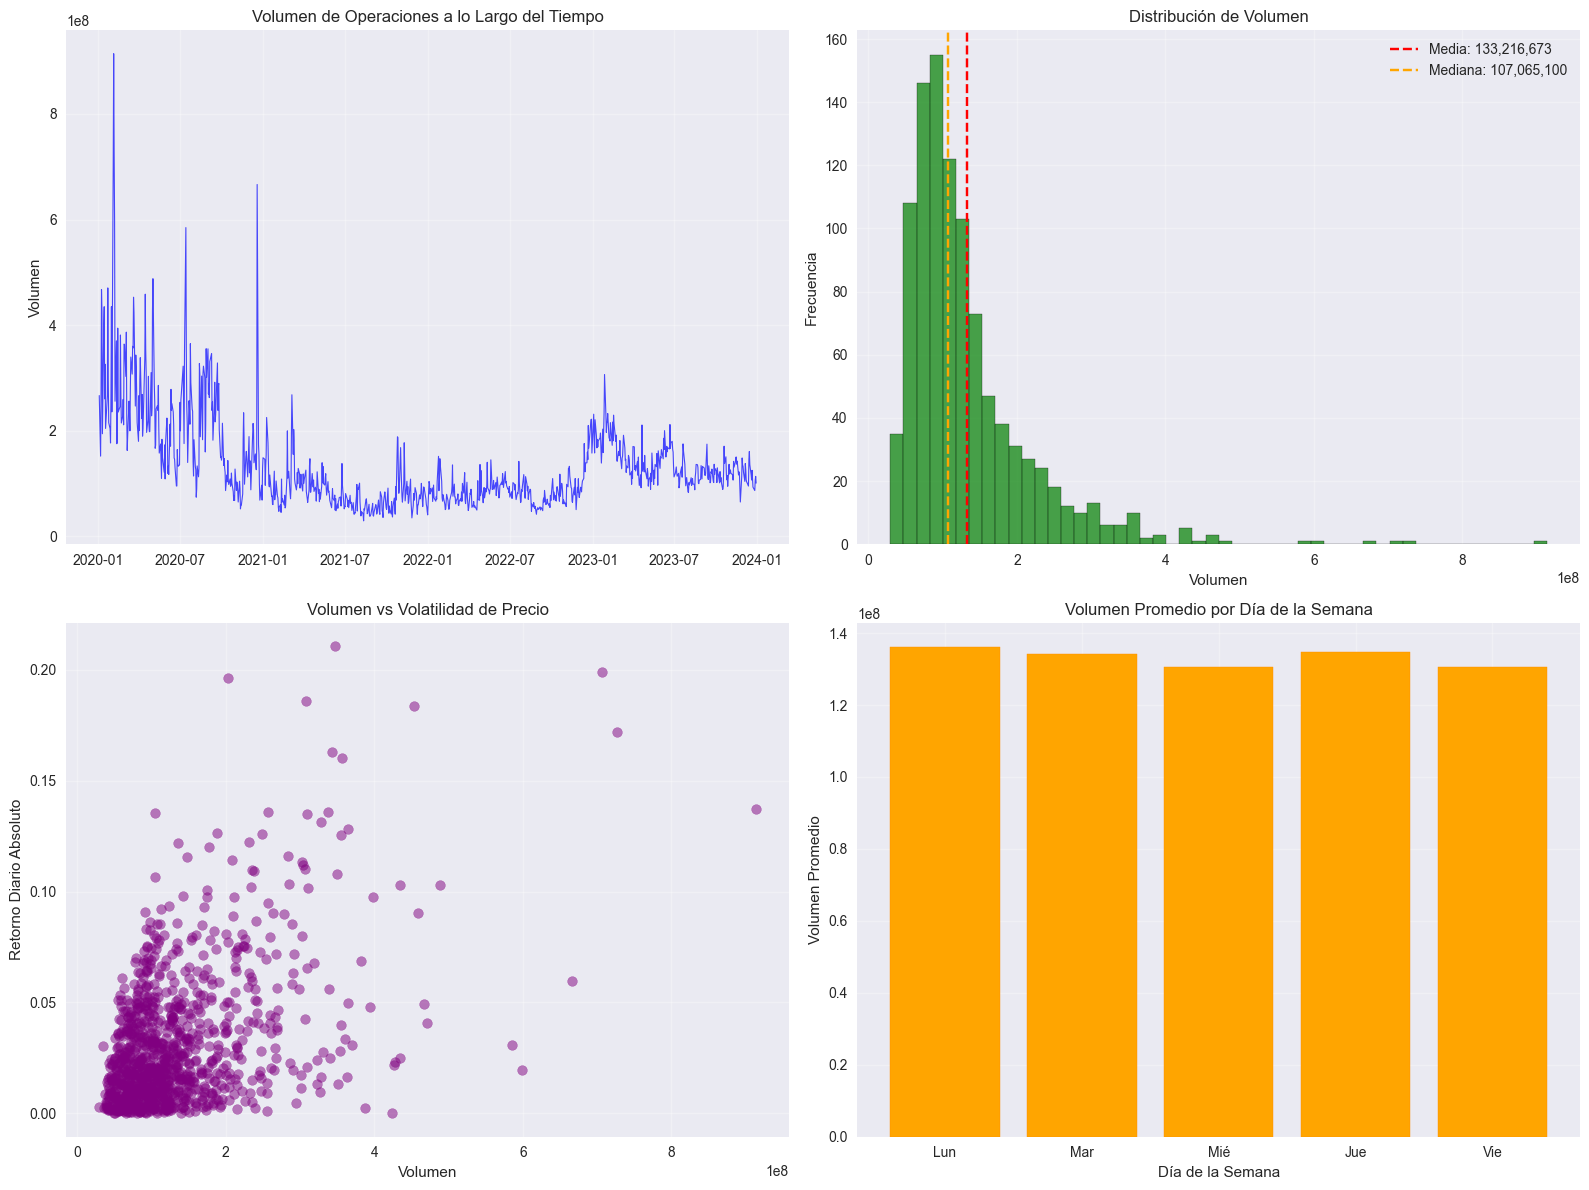


📊 ESTADÍSTICAS DE VOLUMEN
Volumen diario promedio: 133,216,673 acciones
Volumen máximo: 914,082,000 acciones
Volumen mínimo: 29,401,800 acciones
Mediana de volumen: 107,065,100 acciones


In [25]:
# Análisis de patrones de volumen
def analyze_volume_patterns():
    """
    Analizar patrones de volumen y correlaciones
    """
    if tesla_df is None:
        print("❌ Error: No hay datos disponibles para análisis de volumen.")
        return None
        
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Volumen a lo largo del tiempo
    axes[0,0].plot(tesla_df.index, tesla_df['Volume'], alpha=0.7, color='blue', linewidth=0.8)
    
    # Promedio móvil de volumen si existe
    if 'Volume_MA' in tesla_df.columns:
        axes[0,0].plot(tesla_df.index, tesla_df['Volume_MA'], color='red', linewidth=2, label='Promedio 20 días')
        axes[0,0].legend()
    
    axes[0,0].set_title('Volumen de Operaciones a lo Largo del Tiempo')
    axes[0,0].set_ylabel('Volumen')
    axes[0,0].grid(True, alpha=0.3)
    
    # Distribución de volumen
    axes[0,1].hist(tesla_df['Volume'], bins=50, alpha=0.7, color='green', edgecolor='black')
    axes[0,1].axvline(tesla_df['Volume'].mean(), color='red', linestyle='--', 
                     label=f'Media: {tesla_df["Volume"].mean():,.0f}')
    axes[0,1].axvline(tesla_df['Volume'].median(), color='orange', linestyle='--', 
                     label=f'Mediana: {tesla_df["Volume"].median():,.0f}')
    axes[0,1].set_title('Distribución de Volumen')
    axes[0,1].set_xlabel('Volumen')
    axes[0,1].set_ylabel('Frecuencia')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Volumen vs Cambio de Precio (si existe Daily_Return)
    if 'Daily_Return' in tesla_df.columns:
        axes[1,0].scatter(tesla_df['Volume'], abs(tesla_df['Daily_Return']), alpha=0.5, color='purple')
        axes[1,0].set_xlabel('Volumen')
        axes[1,0].set_ylabel('Retorno Diario Absoluto')
        axes[1,0].set_title('Volumen vs Volatilidad de Precio')
        axes[1,0].grid(True, alpha=0.3)
    
    # Volumen por día de la semana
    tesla_df['DayOfWeek'] = tesla_df.index.dayofweek
    day_names = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie']
    dow_volume = tesla_df.groupby('DayOfWeek')['Volume'].mean()
    
    axes[1,1].bar(range(5), dow_volume.values[:5], color='orange', edgecolor='darkorange')
    axes[1,1].set_title('Volumen Promedio por Día de la Semana')
    axes[1,1].set_xlabel('Día de la Semana')
    axes[1,1].set_ylabel('Volumen Promedio')
    axes[1,1].set_xticks(range(5))
    axes[1,1].set_xticklabels(day_names)
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Estadísticas de volumen
    print("\n📊 ESTADÍSTICAS DE VOLUMEN")
    print("=" * 25)
    print(f"Volumen diario promedio: {tesla_df['Volume'].mean():,.0f} acciones")
    print(f"Volumen máximo: {tesla_df['Volume'].max():,.0f} acciones")
    print(f"Volumen mínimo: {tesla_df['Volume'].min():,.0f} acciones")
    print(f"Mediana de volumen: {tesla_df['Volume'].median():,.0f} acciones")
    
    return dow_volume

# Ejecutar análisis solo si hay datos disponibles
if data_loaded and tesla_df is not None:
    volume_analysis = analyze_volume_patterns()
else:
    print("⚠️ No se puede ejecutar el análisis de volumen sin datos válidos.")

## 4. Análisis de Volatilidad

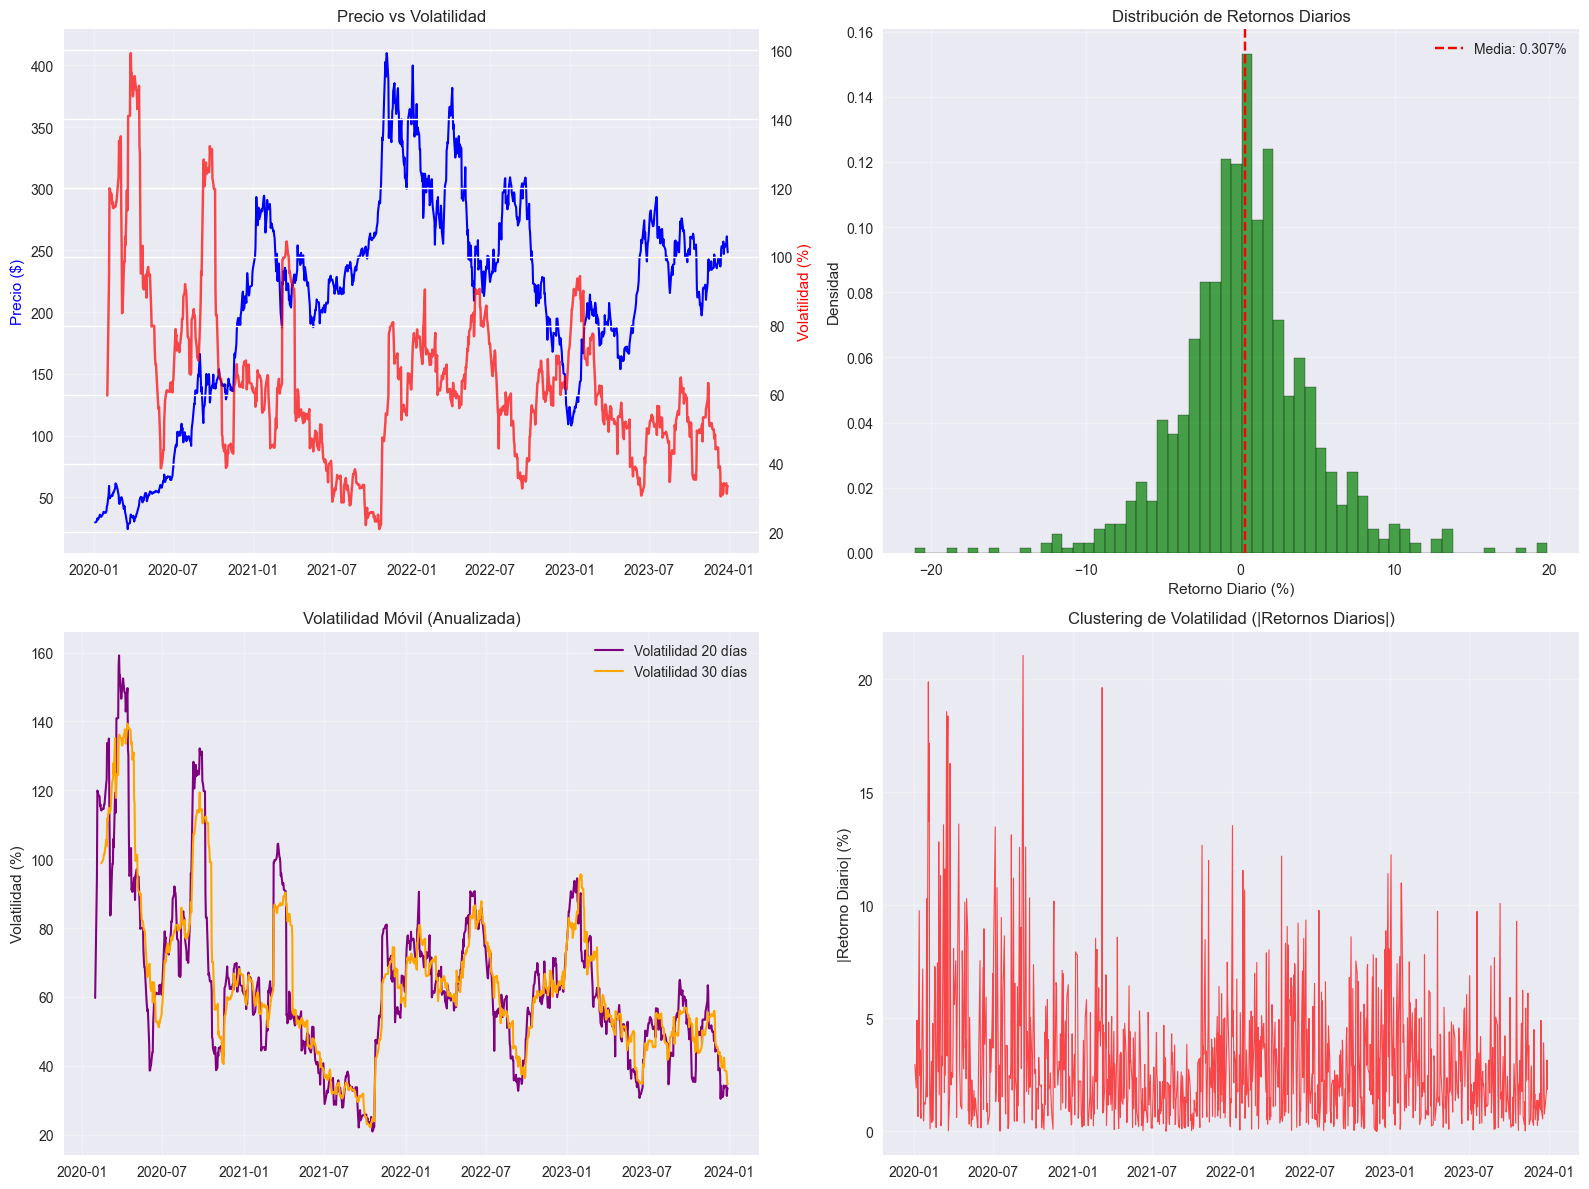

ESTADÍSTICAS DE VOLATILIDAD
Volatilidad diaria promedio: 4.29%
Volatilidad anualizada: 68.1%
Máxima ganancia diaria: 19.89%
Máxima pérdida diaria: -21.06%
Días positivos: 540 (53.7%)
Días negativos: 464 (46.2%)

Días de alta volatilidad (>2σ): 53 días


In [26]:
# Análisis de volatilidad
def analyze_volatility():
    """
    Análisis comprehensivo de volatilidad
    """
    if 'Daily_Return' not in tesla_df.columns:
        print("Columna 'Daily_Return' no encontrada. Calculando...")
        tesla_df['Daily_Return'] = tesla_df['Close'].pct_change()
    
    # Calcular volatilidad móvil
    tesla_df['Volatility_20'] = tesla_df['Daily_Return'].rolling(20).std() * np.sqrt(252) * 100  # Anualizada
    tesla_df['Volatility_30'] = tesla_df['Daily_Return'].rolling(30).std() * np.sqrt(252) * 100  # Anualizada
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Precio vs Volatilidad
    ax1 = axes[0,0]
    ax2 = ax1.twinx()
    
    line1 = ax1.plot(tesla_df.index, tesla_df['Close'], 'b-', label='Precio', linewidth=1.5)
    line2 = ax2.plot(tesla_df.index, tesla_df['Volatility_20'], 'r-', alpha=0.7, label='Volatilidad 20d')
    
    ax1.set_ylabel('Precio ($)', color='b')
    ax2.set_ylabel('Volatilidad (%)', color='r')
    ax1.set_title('Precio vs Volatilidad')
    ax1.grid(True, alpha=0.3)
    
    # Distribución de retornos
    axes[0,1].hist(tesla_df['Daily_Return'] * 100, bins=60, alpha=0.7, color='green', 
                   edgecolor='black', density=True)
    axes[0,1].set_title('Distribución de Retornos Diarios')
    axes[0,1].set_xlabel('Retorno Diario (%)')
    axes[0,1].set_ylabel('Densidad')
    axes[0,1].grid(True, alpha=0.3)
    
    # Agregar estadísticas normales
    mean_return = tesla_df['Daily_Return'].mean() * 100
    std_return = tesla_df['Daily_Return'].std() * 100
    axes[0,1].axvline(mean_return, color='red', linestyle='--', 
                     label=f'Media: {mean_return:.3f}%')
    axes[0,1].legend()
    
    # Volatilidad a lo largo del tiempo
    axes[1,0].plot(tesla_df.index, tesla_df['Volatility_20'], color='purple', linewidth=1.5, 
                   label='Volatilidad 20 días')
    axes[1,0].plot(tesla_df.index, tesla_df['Volatility_30'], color='orange', linewidth=1.5, 
                   label='Volatilidad 30 días')
    axes[1,0].set_title('Volatilidad Móvil (Anualizada)')
    axes[1,0].set_ylabel('Volatilidad (%)')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Clustering de volatilidad (retornos absolutos)
    axes[1,1].plot(tesla_df.index, abs(tesla_df['Daily_Return']) * 100, color='red', 
                   alpha=0.7, linewidth=0.8)
    axes[1,1].set_title('Clustering de Volatilidad (|Retornos Diarios|)')
    axes[1,1].set_ylabel('|Retorno Diario| (%)')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Estadísticas de volatilidad
    print("ESTADÍSTICAS DE VOLATILIDAD")
    print("=" * 30)
    print(f"Volatilidad diaria promedio: {tesla_df['Daily_Return'].std() * 100:.2f}%")
    print(f"Volatilidad anualizada: {tesla_df['Daily_Return'].std() * np.sqrt(252) * 100:.1f}%")
    print(f"Máxima ganancia diaria: {tesla_df['Daily_Return'].max() * 100:.2f}%")
    print(f"Máxima pérdida diaria: {tesla_df['Daily_Return'].min() * 100:.2f}%")
    print(f"Días positivos: {(tesla_df['Daily_Return'] > 0).sum()} ({(tesla_df['Daily_Return'] > 0).mean() * 100:.1f}%)")
    print(f"Días negativos: {(tesla_df['Daily_Return'] < 0).sum()} ({(tesla_df['Daily_Return'] < 0).mean() * 100:.1f}%)")
    
    # Períodos de alta volatilidad
    high_vol_threshold = tesla_df['Daily_Return'].std() * 2
    high_vol_days = tesla_df[abs(tesla_df['Daily_Return']) > high_vol_threshold]
    print(f"\nDías de alta volatilidad (>2σ): {len(high_vol_days)} días")
    
    return high_vol_days

high_volatility_periods = analyze_volatility()

## 5. Análisis de Patrones Estacionales

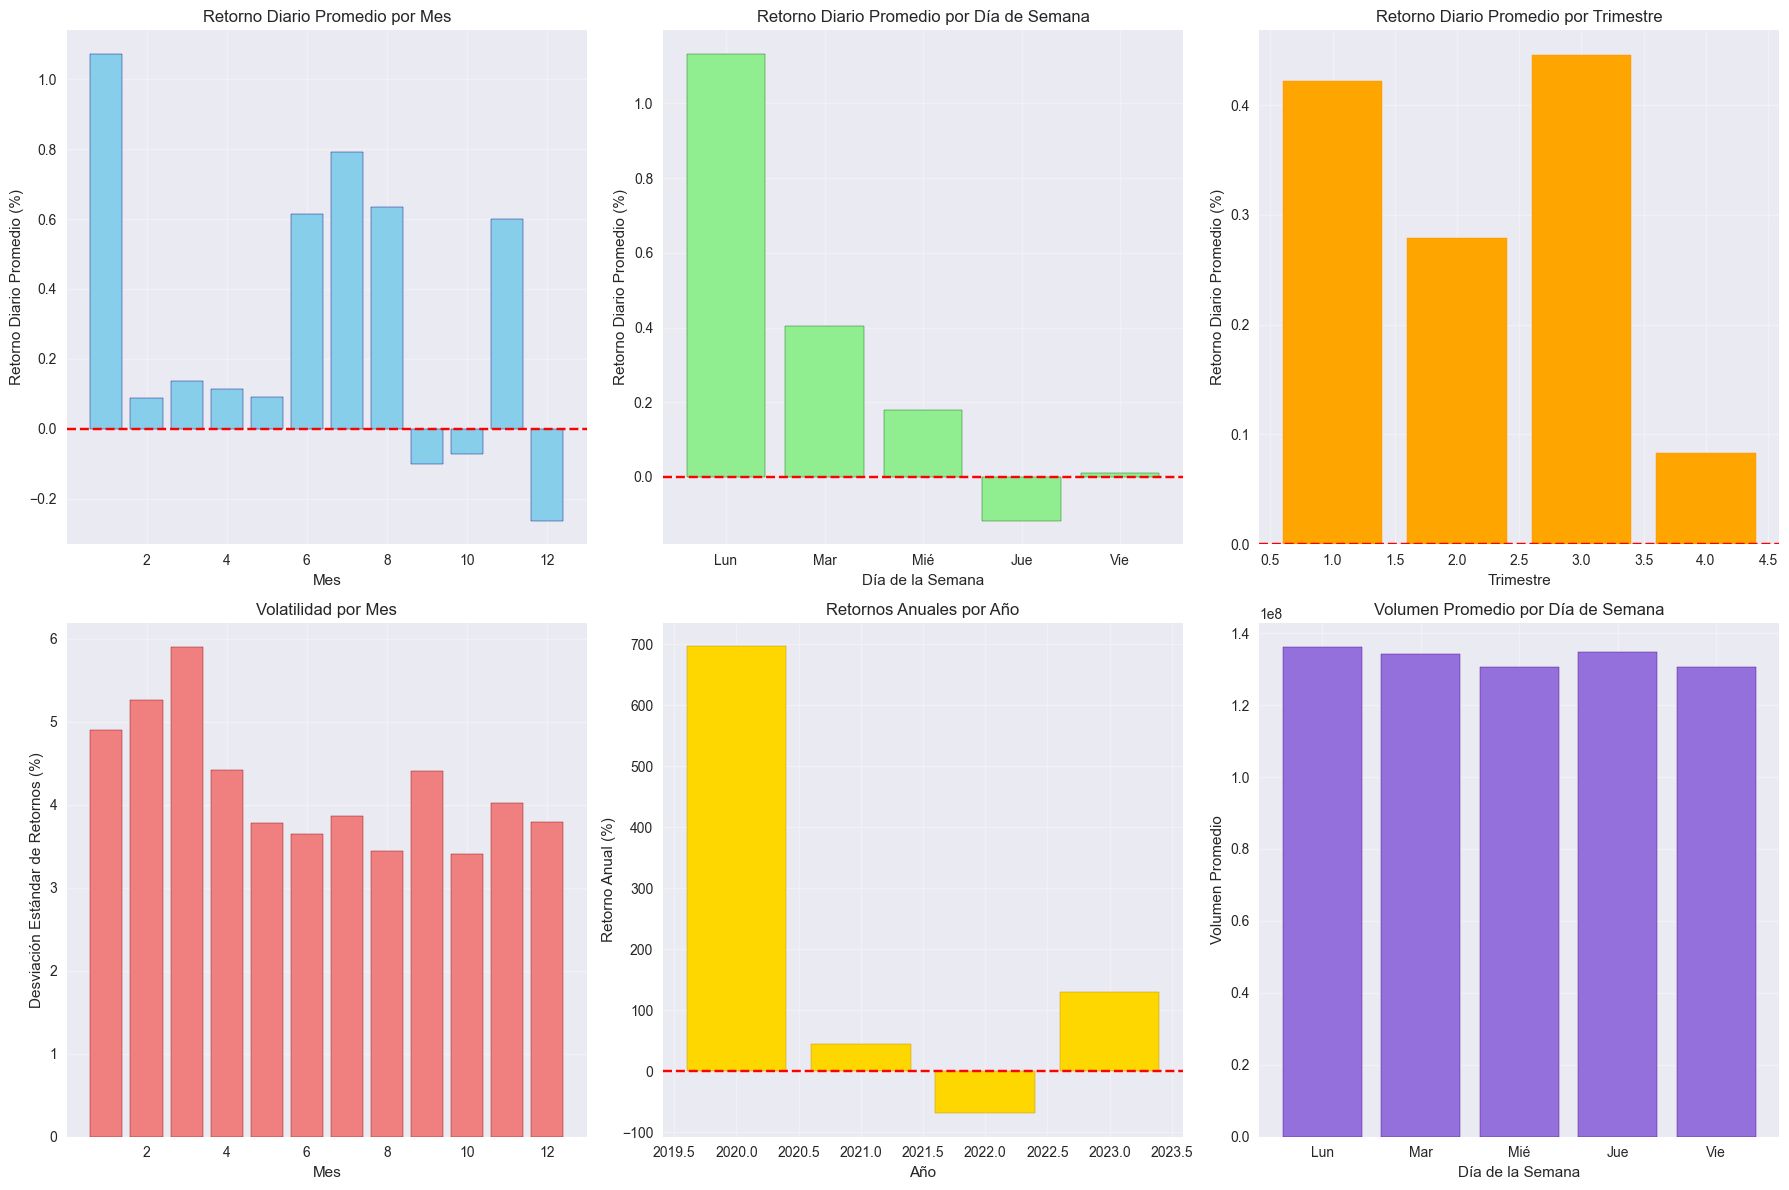

RESULTADOS DE ANÁLISIS ESTACIONAL

Mejores/Peores Meses (por retorno promedio):
Mejor mes: 1 (1.073%)
Peor mes: 12 (-0.263%)

Mejores/Peores Días de la Semana:
Mejor día: Lun (1.133%)
Peor día: Jue (-0.118%)

Volatilidad por Trimestre:
Q1: 5.39%
Q2: 3.95%
Q3: 3.91%
Q4: 3.75%


In [27]:
# Análisis estacional y temporal
def analyze_seasonal_patterns():
    """
    Analizar patrones estacionales y efectos por día de la semana
    """
    if 'Daily_Return' not in tesla_df.columns:
        tesla_df['Daily_Return'] = tesla_df['Close'].pct_change()
    
    # Agregar características temporales
    tesla_df['Year'] = tesla_df.index.year
    tesla_df['Month'] = tesla_df.index.month
    tesla_df['DayOfWeek'] = tesla_df.index.dayofweek
    tesla_df['Quarter'] = tesla_df.index.quarter
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Retornos mensuales
    monthly_returns = tesla_df.groupby('Month')['Daily_Return'].mean() * 100
    axes[0,0].bar(monthly_returns.index, monthly_returns.values, color='skyblue', edgecolor='navy')
    axes[0,0].set_title('Retorno Diario Promedio por Mes')
    axes[0,0].set_xlabel('Mes')
    axes[0,0].set_ylabel('Retorno Diario Promedio (%)')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].axhline(y=0, color='red', linestyle='--')
    
    # Retornos por día de la semana
    day_names = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie']
    dow_returns = tesla_df.groupby('DayOfWeek')['Daily_Return'].mean() * 100
    axes[0,1].bar(range(5), dow_returns.values[:5], color='lightgreen', edgecolor='darkgreen')
    axes[0,1].set_title('Retorno Diario Promedio por Día de Semana')
    axes[0,1].set_xlabel('Día de la Semana')
    axes[0,1].set_ylabel('Retorno Diario Promedio (%)')
    axes[0,1].set_xticks(range(5))
    axes[0,1].set_xticklabels(day_names)
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].axhline(y=0, color='red', linestyle='--')
    
    # Análisis trimestral
    quarterly_returns = tesla_df.groupby('Quarter')['Daily_Return'].mean() * 100
    axes[0,2].bar(quarterly_returns.index, quarterly_returns.values, color='orange', edgecolor='darkorange')
    axes[0,2].set_title('Retorno Diario Promedio por Trimestre')
    axes[0,2].set_xlabel('Trimestre')
    axes[0,2].set_ylabel('Retorno Diario Promedio (%)')
    axes[0,2].grid(True, alpha=0.3)
    axes[0,2].axhline(y=0, color='red', linestyle='--')
    
    # Volatilidad mensual
    monthly_vol = tesla_df.groupby('Month')['Daily_Return'].std() * 100
    axes[1,0].bar(monthly_vol.index, monthly_vol.values, color='lightcoral', edgecolor='darkred')
    axes[1,0].set_title('Volatilidad por Mes')
    axes[1,0].set_xlabel('Mes')
    axes[1,0].set_ylabel('Desviación Estándar de Retornos (%)')
    axes[1,0].grid(True, alpha=0.3)
    
    # Rendimiento anual
    yearly_returns = []
    years = []
    for year in tesla_df['Year'].unique():
        year_data = tesla_df[tesla_df['Year'] == year]
        if len(year_data) > 0:
            yearly_return = (year_data['Close'].iloc[-1] / year_data['Close'].iloc[0] - 1) * 100
            yearly_returns.append(yearly_return)
            years.append(year)
    
    if len(yearly_returns) > 0:
        axes[1,1].bar(years, yearly_returns, color='gold', edgecolor='darkgoldenrod')
        axes[1,1].set_title('Retornos Anuales por Año')
        axes[1,1].set_xlabel('Año')
        axes[1,1].set_ylabel('Retorno Anual (%)')
        axes[1,1].grid(True, alpha=0.3)
        axes[1,1].axhline(y=0, color='red', linestyle='--')
    
    # Patrones de volumen por día de semana
    dow_volume = tesla_df.groupby('DayOfWeek')['Volume'].mean()
    axes[1,2].bar(range(5), dow_volume.values[:5], color='mediumpurple', edgecolor='indigo')
    axes[1,2].set_title('Volumen Promedio por Día de Semana')
    axes[1,2].set_xlabel('Día de la Semana')
    axes[1,2].set_ylabel('Volumen Promedio')
    axes[1,2].set_xticks(range(5))
    axes[1,2].set_xticklabels(day_names)
    axes[1,2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Imprimir estadísticas estacionales
    print("RESULTADOS DE ANÁLISIS ESTACIONAL")
    print("=" * 35)
    print("\nMejores/Peores Meses (por retorno promedio):")
    print(f"Mejor mes: {monthly_returns.idxmax()} ({monthly_returns.max():.3f}%)")
    print(f"Peor mes: {monthly_returns.idxmin()} ({monthly_returns.min():.3f}%)")
    
    print("\nMejores/Peores Días de la Semana:")
    print(f"Mejor día: {day_names[dow_returns.idxmax()]} ({dow_returns.max():.3f}%)")
    print(f"Peor día: {day_names[dow_returns.idxmin()]} ({dow_returns.min():.3f}%)")
    
    print("\nVolatilidad por Trimestre:")
    quarterly_vol = tesla_df.groupby('Quarter')['Daily_Return'].std() * 100
    for q, vol in quarterly_vol.items():
        print(f"Q{q}: {vol:.2f}%")
    
    return {
        'monthly_returns': monthly_returns,
        'dow_returns': dow_returns,
        'quarterly_returns': quarterly_returns,
        'yearly_returns': dict(zip(years, yearly_returns))
    }

seasonal_results = analyze_seasonal_patterns()

## 6. Análisis de Correlaciones

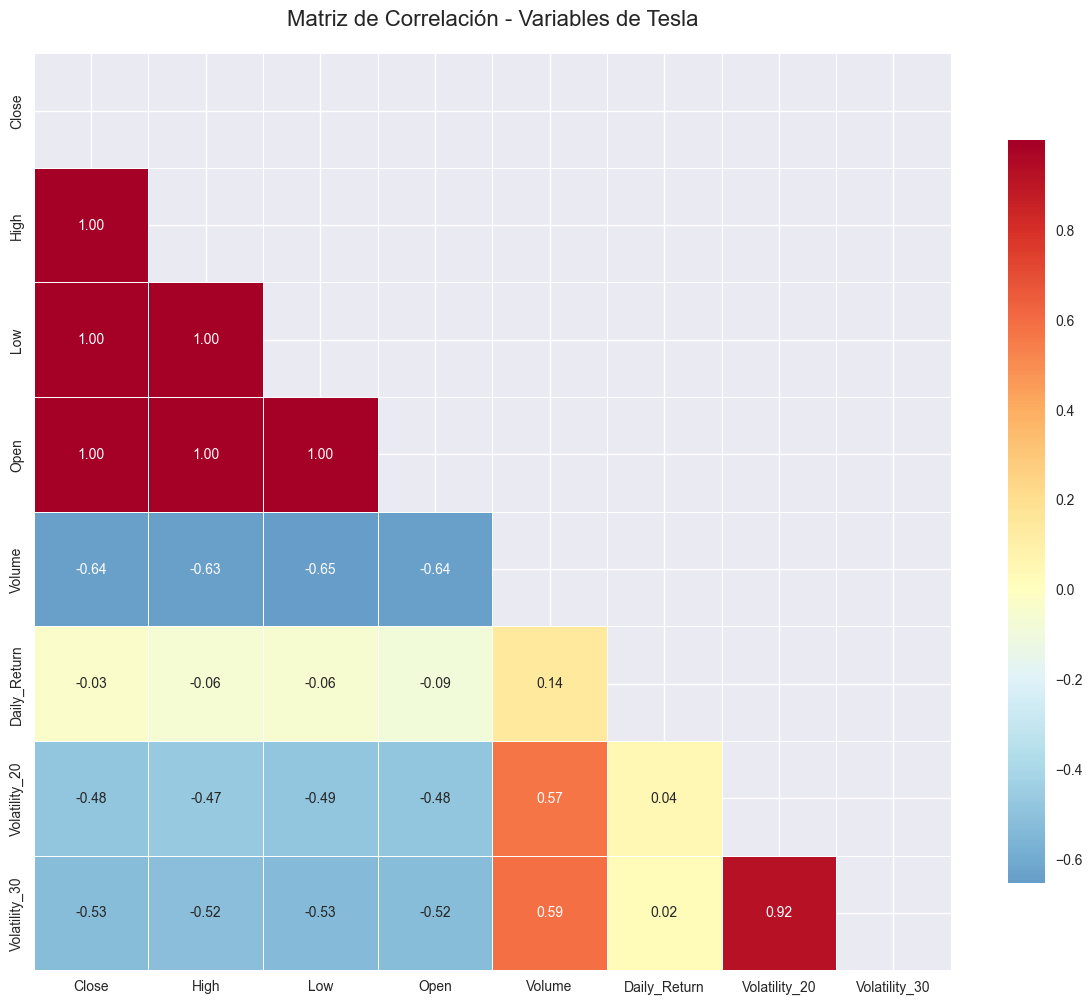


CORRELACIONES MÁS FUERTES CON PRECIO DE CIERRE:
Low: 0.999
High: 0.998
Open: 0.996
Volume: -0.642
Volatility_30: -0.525
Volatility_20: -0.482
Daily_Return: -0.029


In [28]:
# Análisis de correlaciones
def analyze_correlations():
    """
    Analizar correlaciones entre variables
    """
    # Seleccionar columnas numéricas para correlación
    numeric_cols = tesla_df.select_dtypes(include=[np.number]).columns
    correlation_cols = [col for col in numeric_cols if col not in ['Year', 'Month', 'DayOfWeek', 'Quarter']]
    
    if len(correlation_cols) < 2:
        print("No hay suficientes columnas numéricas para análisis de correlación")
        return
    
    # Calcular matriz de correlación
    corr_matrix = tesla_df[correlation_cols].corr()
    
    # Crear heatmap de correlación
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
    plt.title('Matriz de Correlación - Variables de Tesla', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Correlaciones más fuertes con precio de cierre
    if 'Close' in correlation_cols:
        close_corr = corr_matrix['Close'].abs().sort_values(ascending=False)
        print("\nCORRELACIONES MÁS FUERTES CON PRECIO DE CIERRE:")
        print("=" * 50)
        for var, corr in close_corr.items():
            if var != 'Close' and not pd.isna(corr):
                print(f"{var}: {corr_matrix['Close'][var]:.3f}")
    
    return corr_matrix

correlation_matrix = analyze_correlations()

## 7. Resumen de Insights Clave

In [29]:
# Generar resumen completo de EDA
def generate_eda_summary():
    """
    Generar resumen completo de hallazgos de EDA
    """
    print("🚀 TESLA STOCK EDA - INSIGHTS CLAVE")
    print("=" * 50)
    
    # Rendimiento de precios
    total_return = (tesla_df['Close'].iloc[-1] / tesla_df['Close'].iloc[0] - 1) * 100
    days_analyzed = len(tesla_df)
    years_analyzed = (tesla_df.index.max() - tesla_df.index.min()).days / 365.25
    cagr = ((tesla_df['Close'].iloc[-1] / tesla_df['Close'].iloc[0]) ** (1/years_analyzed) - 1) * 100
    
    print("\n📈 RENDIMIENTO DE PRECIOS:")
    print(f"  • Retorno Total: {total_return:.1f}%")
    print(f"  • Retorno Anualizado (CAGR): {cagr:.1f}%")
    print(f"  • Rango de Precios: ${tesla_df['Close'].min():.2f} - ${tesla_df['Close'].max():.2f}")
    
    if 'Daily_Return' in tesla_df.columns:
        print(f"  • Retorno Diario Promedio: {tesla_df['Daily_Return'].mean()*100:.3f}%")
        
        # Insights de volatilidad
        print("\n📊 ANÁLISIS DE VOLATILIDAD:")
        print(f"  • Volatilidad Diaria: {tesla_df['Daily_Return'].std()*100:.2f}%")
        print(f"  • Volatilidad Anualizada: {tesla_df['Daily_Return'].std()*np.sqrt(252)*100:.1f}%")
        print(f"  • Días Positivos: {(tesla_df['Daily_Return'] > 0).mean()*100:.1f}%")
        print(f"  • Máxima Ganancia Diaria: {tesla_df['Daily_Return'].max()*100:.2f}%")
        print(f"  • Máxima Pérdida Diaria: {tesla_df['Daily_Return'].min()*100:.2f}%")
    
    # Insights de volumen
    print("\n📊 PATRONES DE VOLUMEN:")
    print(f"  • Volumen Diario Promedio: {tesla_df['Volume'].mean():,.0f} acciones")
    print(f"  • Volumen Máximo: {tesla_df['Volume'].max():,.0f} acciones")
    
    if 'Daily_Return' in tesla_df.columns:
        vol_price_corr = tesla_df['Volume'].corr(tesla_df['Daily_Return'].abs())
        if not pd.isna(vol_price_corr):
            print(f"  • Correlación Volumen-Volatilidad: {vol_price_corr:.3f}")
    
    # Patrones estacionales
    if 'seasonal_results' in globals() and seasonal_results:
        print("\n📅 PATRONES ESTACIONALES:")
        monthly_returns = seasonal_results['monthly_returns']
        dow_returns = seasonal_results['dow_returns']
        day_names = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
        
        print(f"  • Mejor mes: {monthly_returns.idxmax()} ({monthly_returns.max():.3f}%)")
        print(f"  • Peor mes: {monthly_returns.idxmin()} ({monthly_returns.min():.3f}%)")
        
        if len(dow_returns) >= 5:
            print(f"  • Mejor día: {day_names[dow_returns.idxmax()]} ({dow_returns.max():.3f}%)")
            print(f"  • Peor día: {day_names[dow_returns.idxmin()]} ({dow_returns.min():.3f}%)")
    
    # Recomendaciones clave para modelado
    print("\n🎯 HALLAZGOS CLAVE PARA MODELADO:")
    print("  • Alta volatilidad crea oportunidades de predicción")
    print("  • Picos de volumen frecuentemente preceden movimientos significativos")
    print("  • Efectos estacionales presentes pero no dominantes")
    print("  • Clustering de volatilidad evidente")
    
    if 'Daily_Return' in tesla_df.columns:
        skewness = tesla_df['Daily_Return'].skew()
        kurtosis = tesla_df['Daily_Return'].kurtosis()
        print(f"  • Distribución de retornos: Skewness={skewness:.2f}, Kurtosis={kurtosis:.2f}")
    
    print("\n✅ EDA COMPLETADO - ¡Listo para análisis SQL y modelado!")
    
    # Estadísticas del dataset
    print(f"\n📋 ESTADÍSTICAS DEL DATASET:")
    print(f"  • Total de días analizados: {len(tesla_df):,}")
    print(f"  • Período de análisis: {years_analyzed:.1f} años")
    print(f"  • Columnas analizadas: {len(tesla_df.columns)}")
    print(f"  • Valores faltantes totales: {tesla_df.isnull().sum().sum()}")

generate_eda_summary()

🚀 TESLA STOCK EDA - INSIGHTS CLAVE

📈 RENDIMIENTO DE PRECIOS:
  • Retorno Total: 741.3%
  • Retorno Anualizado (CAGR): 70.6%
  • Rango de Precios: $24.08 - $409.97
  • Retorno Diario Promedio: 0.307%

📊 ANÁLISIS DE VOLATILIDAD:
  • Volatilidad Diaria: 4.29%
  • Volatilidad Anualizada: 68.1%
  • Días Positivos: 53.7%
  • Máxima Ganancia Diaria: 19.89%
  • Máxima Pérdida Diaria: -21.06%

📊 PATRONES DE VOLUMEN:
  • Volumen Diario Promedio: 133,216,673 acciones
  • Volumen Máximo: 914,082,000 acciones
  • Correlación Volumen-Volatilidad: 0.465

📅 PATRONES ESTACIONALES:
  • Mejor mes: 1 (1.073%)
  • Peor mes: 12 (-0.263%)
  • Mejor día: Lun (1.133%)
  • Peor día: Jue (-0.118%)

🎯 HALLAZGOS CLAVE PARA MODELADO:
  • Alta volatilidad crea oportunidades de predicción
  • Picos de volumen frecuentemente preceden movimientos significativos
  • Efectos estacionales presentes pero no dominantes
  • Clustering de volatilidad evidente
  • Distribución de retornos: Skewness=0.07, Kurtosis=2.86

✅ EDA 

## 8. Guardar Resultados de EDA

In [30]:
# Guardar resultados de EDA e insights
import json
import os

# Crear directorio de resultados si no existe
if not os.path.exists('results'):
    os.makedirs('results')

# Compilar resultados de EDA
eda_results = {
    'analysis_date': datetime.now().isoformat(),
    'data_period': f"{tesla_df.index.min().date()} to {tesla_df.index.max().date()}",
    'total_trading_days': len(tesla_df),
    'years_analyzed': float((tesla_df.index.max() - tesla_df.index.min()).days / 365.25),
    
    'price_performance': {
        'total_return_pct': float((tesla_df['Close'].iloc[-1] / tesla_df['Close'].iloc[0] - 1) * 100),
        'min_price': float(tesla_df['Close'].min()),
        'max_price': float(tesla_df['Close'].max()),
        'current_price': float(tesla_df['Close'].iloc[-1]),
        'price_range': float(tesla_df['Close'].max() - tesla_df['Close'].min())
    },
    
    'volume_analysis': {
        'avg_daily_volume': float(tesla_df['Volume'].mean()),
        'max_volume': float(tesla_df['Volume'].max()),
        'min_volume': float(tesla_df['Volume'].min()),
        'median_volume': float(tesla_df['Volume'].median())
    }
}

# Agregar métricas de volatilidad si existen
if 'Daily_Return' in tesla_df.columns:
    returns = tesla_df['Daily_Return'].dropna()
    eda_results['volatility_metrics'] = {
        'daily_volatility_pct': float(returns.std() * 100),
        'annualized_volatility_pct': float(returns.std() * np.sqrt(252) * 100),
        'avg_daily_return_pct': float(returns.mean() * 100),
        'positive_days_pct': float((returns > 0).mean() * 100),
        'max_daily_gain_pct': float(returns.max() * 100),
        'max_daily_loss_pct': float(returns.min() * 100),
        'skewness': float(returns.skew()),
        'kurtosis': float(returns.kurtosis())
    }

# Agregar patrones estacionales si existen
if 'seasonal_results' in globals() and seasonal_results:
    eda_results['seasonal_patterns'] = {
        'best_month': int(seasonal_results['monthly_returns'].idxmax()),
        'worst_month': int(seasonal_results['monthly_returns'].idxmin()),
        'best_month_return': float(seasonal_results['monthly_returns'].max()),
        'worst_month_return': float(seasonal_results['monthly_returns'].min())
    }
    
    if len(seasonal_results['dow_returns']) >= 5:
        eda_results['seasonal_patterns'].update({
            'best_day_of_week': int(seasonal_results['dow_returns'].idxmax()),
            'worst_day_of_week': int(seasonal_results['dow_returns'].idxmin()),
            'best_day_return': float(seasonal_results['dow_returns'].max()),
            'worst_day_return': float(seasonal_results['dow_returns'].min())
        })

# Guardar resultados
try:
    with open('results/eda_results.json', 'w') as f:
        json.dump(eda_results, f, indent=2)
    
    # Guardar dataset enriquecido con características de EDA
    tesla_df.to_csv('data/clean/tesla_with_eda_features.csv')
    
    print("✅ Resultados de EDA y dataset enriquecido guardados exitosamente!")
    print("\nArchivos creados:")
    print("- results/eda_results.json")
    print("- data/clean/tesla_with_eda_features.csv")
    
except Exception as e:
    print(f"❌ Error al guardar archivos: {e}")
    print("Verifica que los directorios 'results' y 'data/clean' existan")

print("\n🚀 ¡Listo para la siguiente fase: Análisis SQL!")

❌ Error al guardar archivos: Cannot save file into a non-existent directory: 'data\clean'
Verifica que los directorios 'results' y 'data/clean' existan

🚀 ¡Listo para la siguiente fase: Análisis SQL!
